In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy import stats
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading data
data = pd.read_csv("../data/data.csv",header=0)

In [4]:
# Exploring the data
data.shape

(569, 33)

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Dropping unwanted columns
data = data.drop(['Unnamed: 32','id'],axis = 1)

In [8]:
# Confirming dropped columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Number of Benign:  357
Number of Malignant :  212


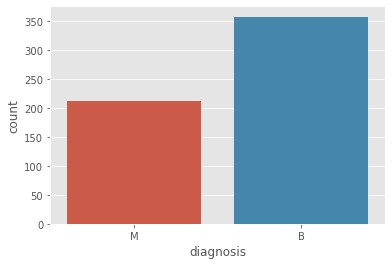

In [9]:
# Bar graph to show the diagnosis
y = data.diagnosis
ax = sns.countplot(y,label="Count")
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

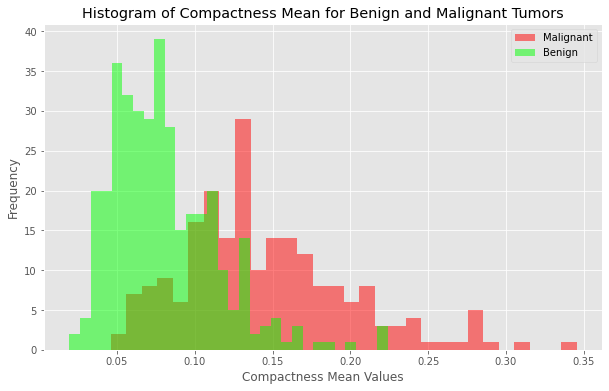

Most frequent malignant compactness mean is:  0.12587666666666666


In [18]:
plt.figure(figsize=(10, 6))
M = plt.hist(data[data["diagnosis"] == "M"].compactness_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
B = plt.hist(data[data["diagnosis"] == "B"].compactness_mean,bins=30,fc = (0,1,0,0.5),label = "Benign")
plt.legend()
plt.xlabel("Compactness Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Compactness Mean for Benign and Malignant Tumors")
plt.show()
frequent_malignant_compactness_mean = M[0].max()
index_frequent_malignant_compactness_mean = list(M[0]).index(frequent_malignant_compactness_mean)
most_frequent_malignant_compactness_mean = M[1][index_frequent_malignant_compactness_mean]
print("Most frequent malignant compactness mean is: ",most_frequent_malignant_compactness_mean)

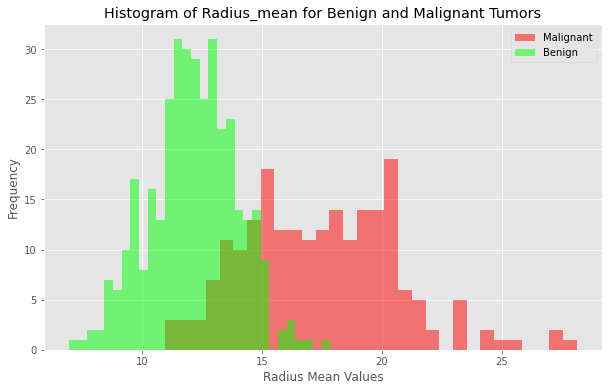

Most frequent malignant radius mean is:  20.101999999999997


In [17]:
plt.figure(figsize=(10, 6))
M = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
B = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Benign")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius_mean for Benign and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = M[0].max()
index_frequent_malignant_radius_mean = list(M[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = M[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

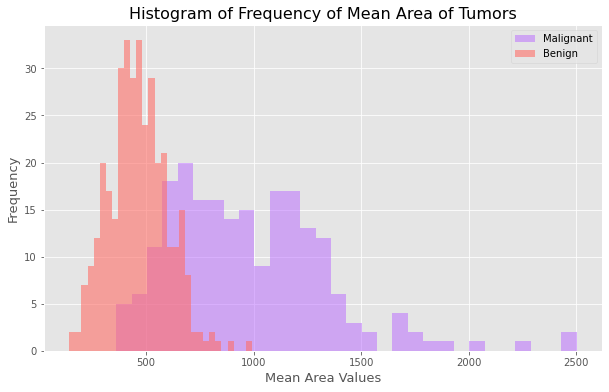

The Maximum Mean Area for Malignant Tumor is 20.0
The Maximum Mean Area for Benign Tumor is 33.0


In [21]:
plt.figure(figsize=(10, 6))
M = plt.hist(data[data.diagnosis == 'M'].area_mean, bins=30, label='Malignant', alpha=0.5, color='#b967ff')
B = plt.hist(data[data.diagnosis == 'B'].area_mean, bins=30, label='Benign', alpha=0.6, color='#ff6f69')
plt.legend()
plt.xlabel('Mean Area Values', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Histogram of Frequency of Mean Area of Tumors', fontsize=16)
plt.show()

# Calculating the maximum mean area of malignant and benign tumors

print('The Maximum Mean Area for Malignant Tumor is',M[0].max())
print('The Maximum Mean Area for Benign Tumor is',B[0].max())

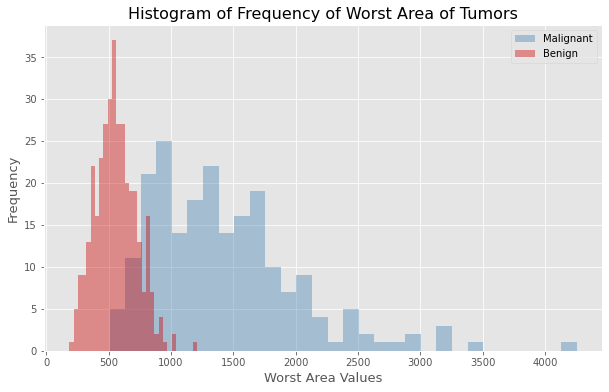

The Maximum Worst Area for Malignant Tumor is 25.0
The Maximum Worst Area for Benign Tumor is 37.0


In [22]:
plt.figure(figsize=(10, 6))
M = plt.hist(data[data.diagnosis == 'M'].area_worst, bins=30, label='Malignant', alpha=0.4, color='#4682b4')
B = plt.hist(data[data.diagnosis == 'B'].area_worst, bins=30, label='Benign', alpha=0.4, color='#cc0000')
plt.legend()
plt.xlabel('Worst Area Values', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Histogram of Frequency of Worst Area of Tumors', fontsize=16)
plt.show()

# Calculating the maximum mean area of malignant and benign tumors

print('The Maximum Worst Area for Malignant Tumor is',M[0].max())
print('The Maximum Worst Area for Benign Tumor is',B[0].max())